# Importing Libraries

# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Feature Engineering:](#10)
11. [Step 10: Feature Scalling:](#11)


# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:\Paractical data scientist\Sensus_Income\\adult.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [5]:
df.drop_duplicates(inplace = True)
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.shape  

(32537, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

<Axes: ylabel='proportion'>

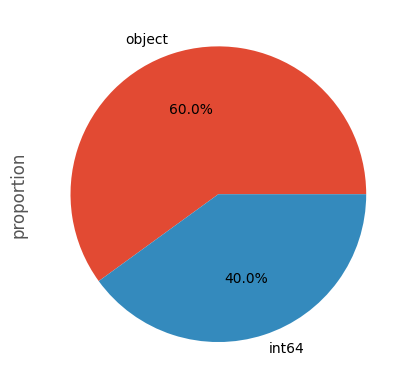

In [9]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

In [10]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) == 1 :
        print("we drop "+col+" : Observing Unique Values")
        df.drop([col], axis=1, inplace=True)

- 
    - Analyse val 0 : ( % of null(emptying) for each column with sum in axis 0 )


In [12]:
df['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
df.replace('?', np.NaN,inplace = True)
df.fillna(method='ffill',inplace = True)

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

<Axes: ylabel='proportion'>

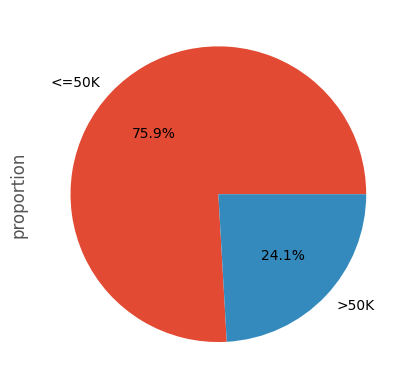

In [15]:
df['income'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

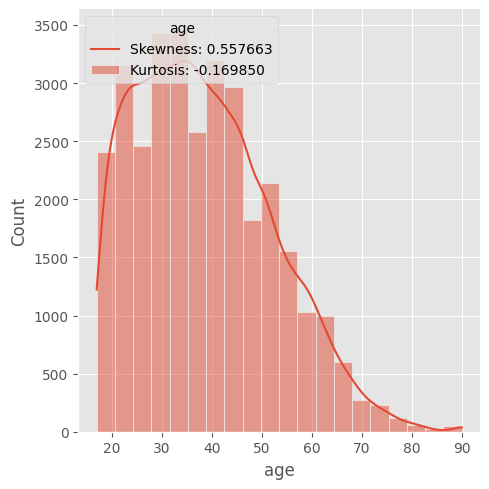

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

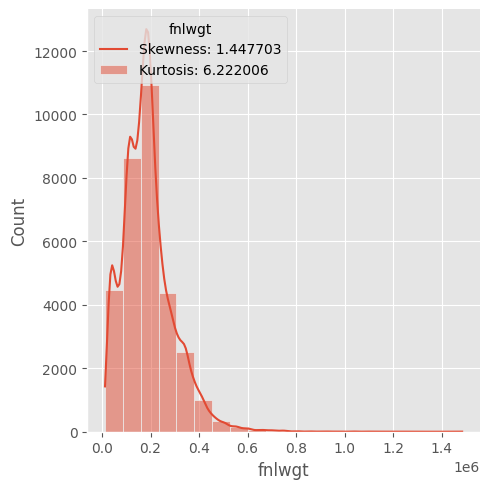

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

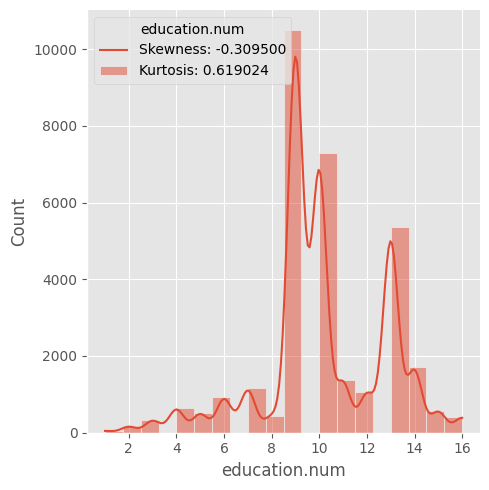

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

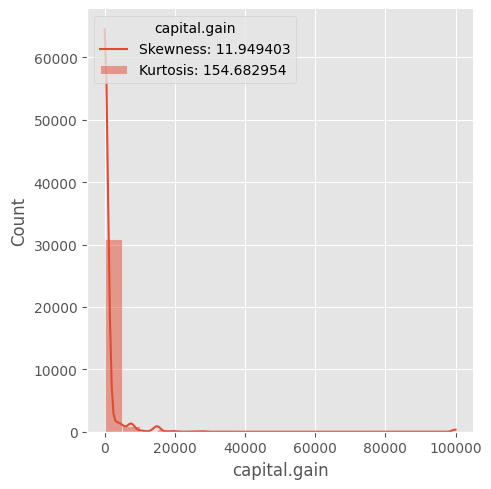

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

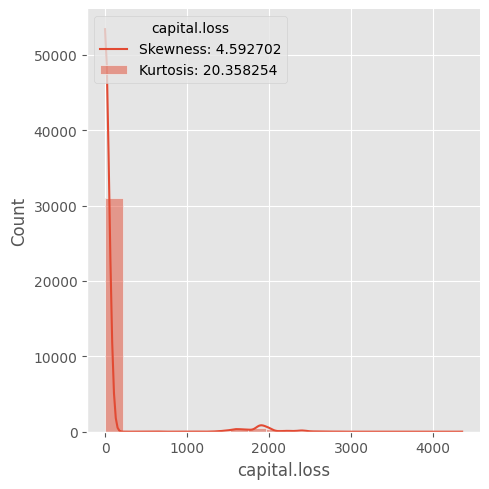

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

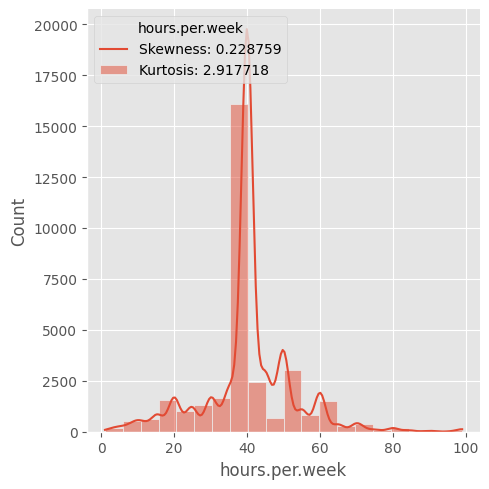

In [17]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

workclass----------------------------------------- [nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education----------------------------------------- ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status------------------------------------ ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation---------------------------------------- [nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship-------------------------------------- ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race------------------

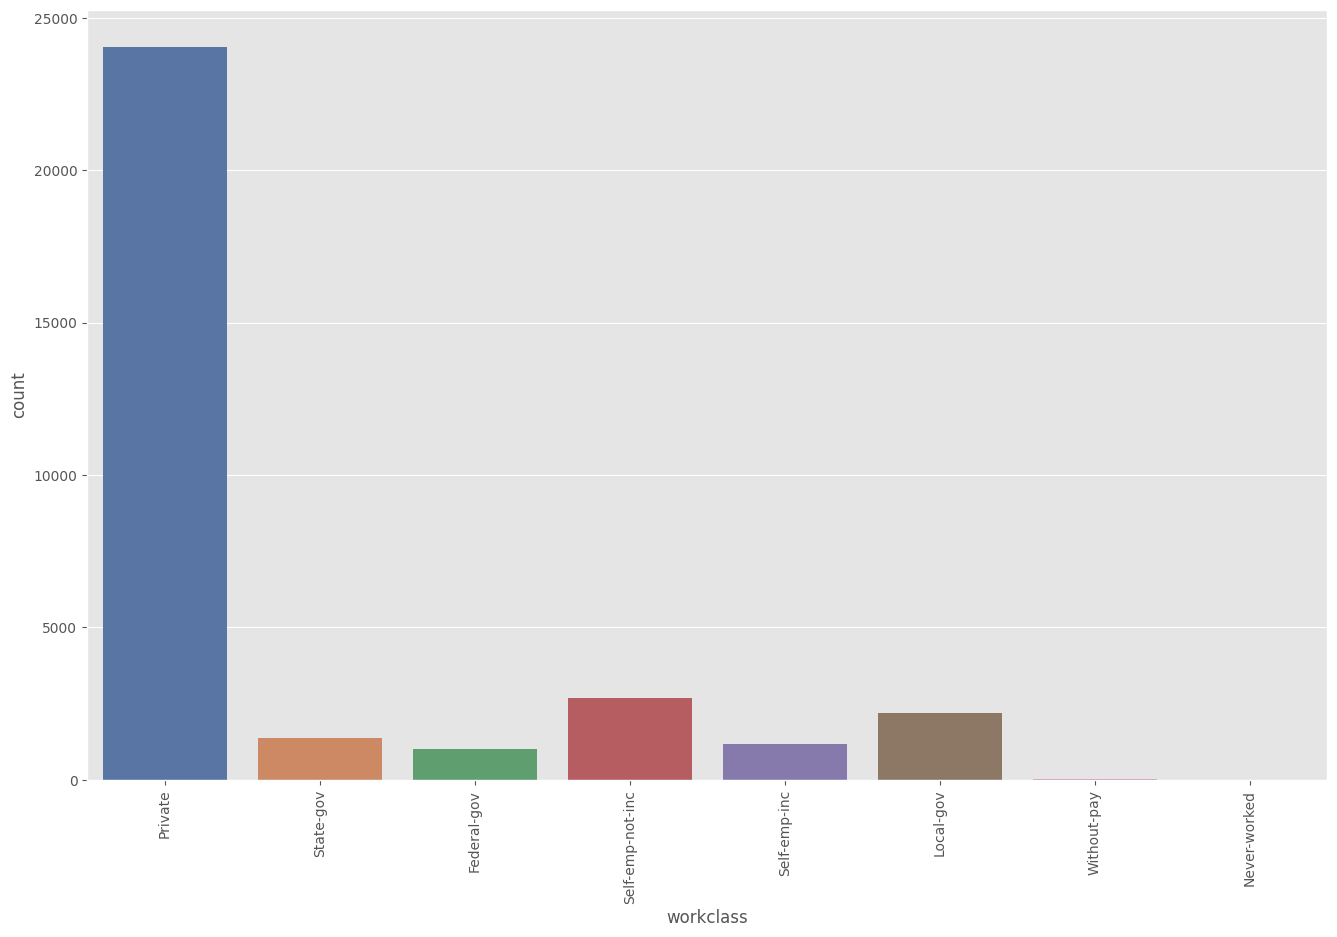

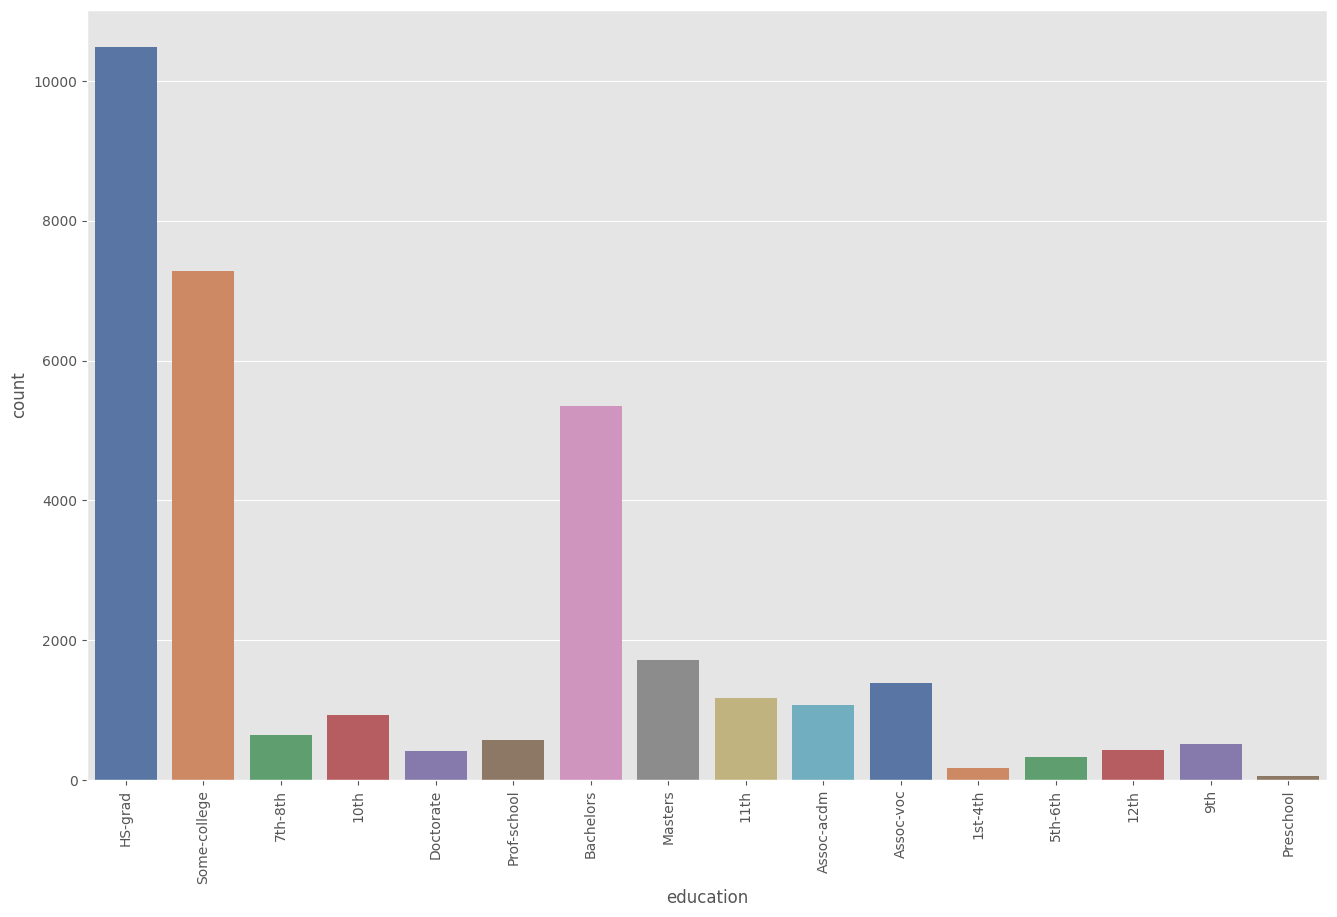

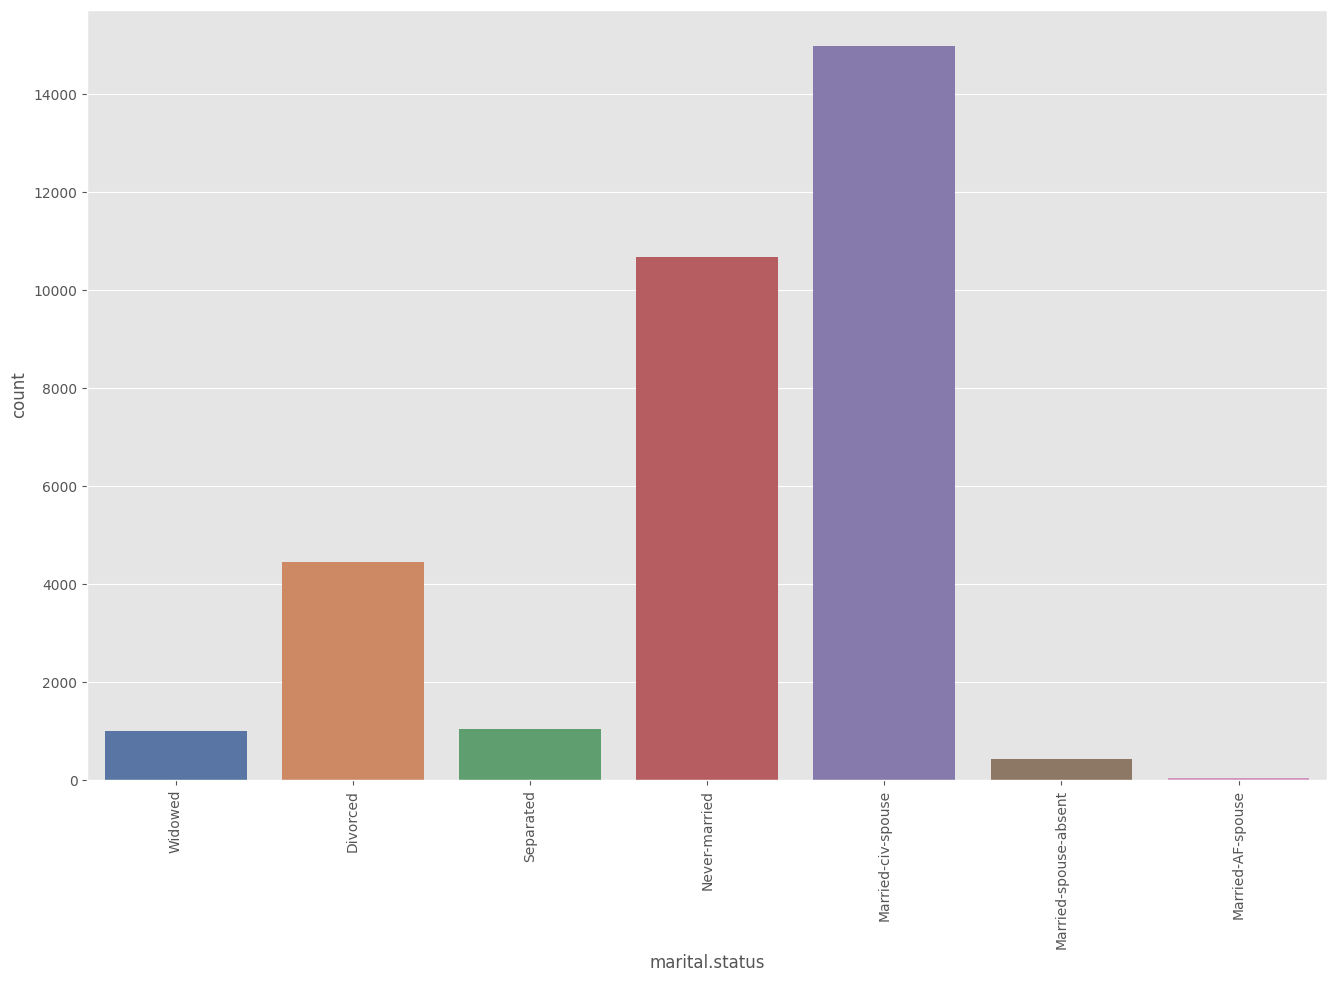

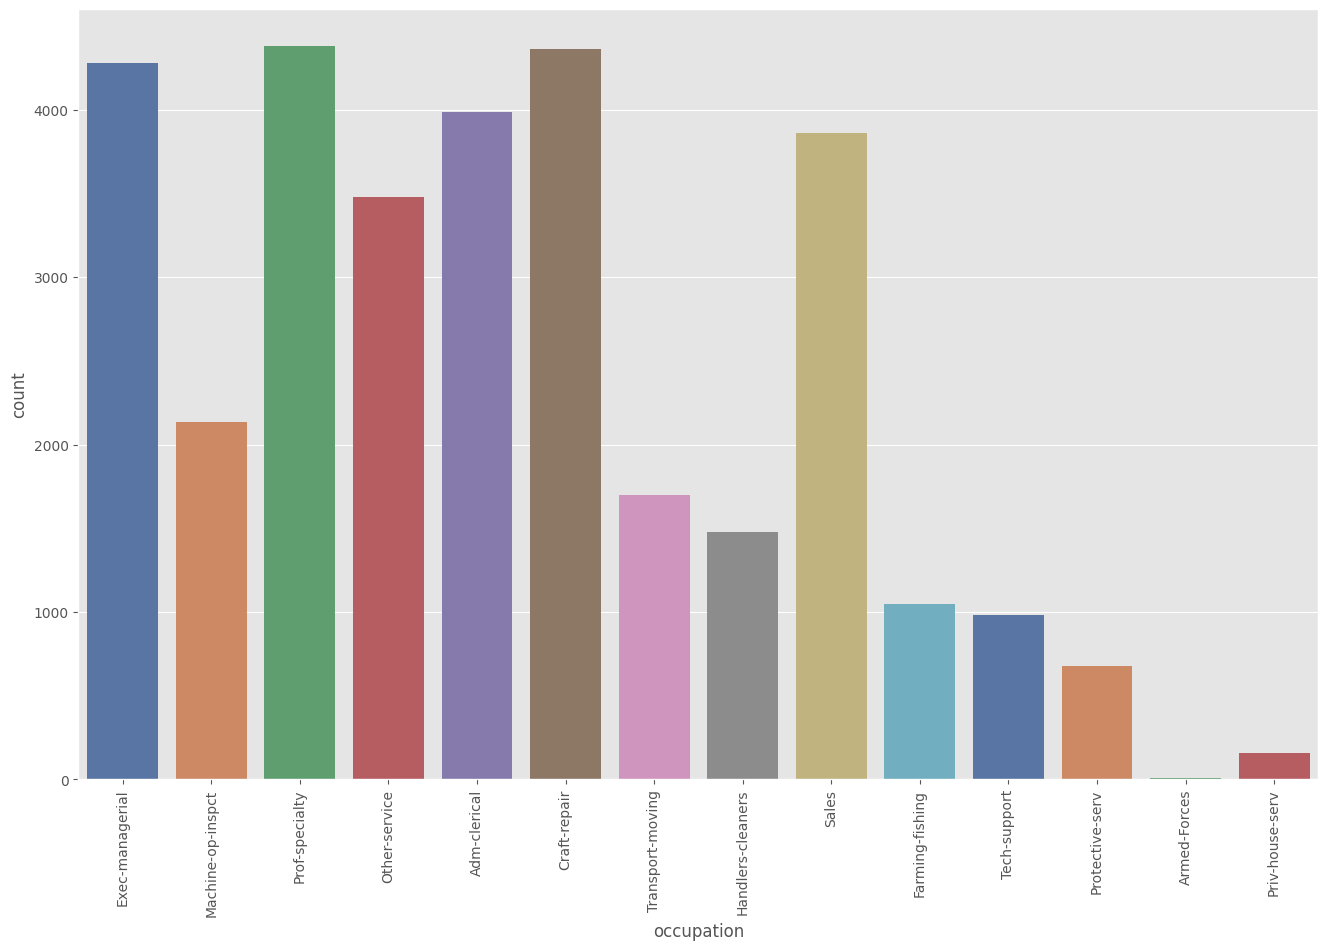

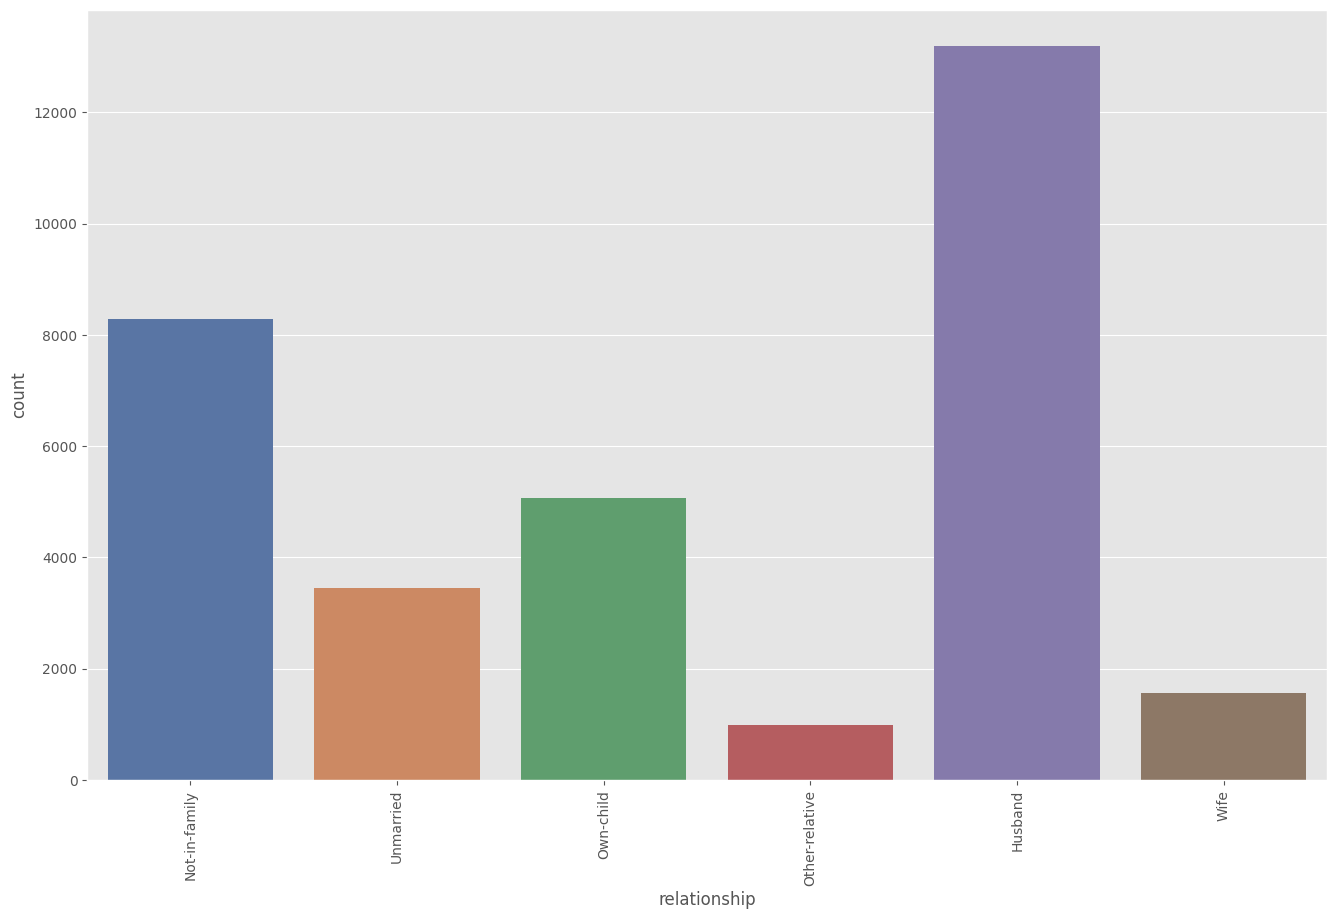

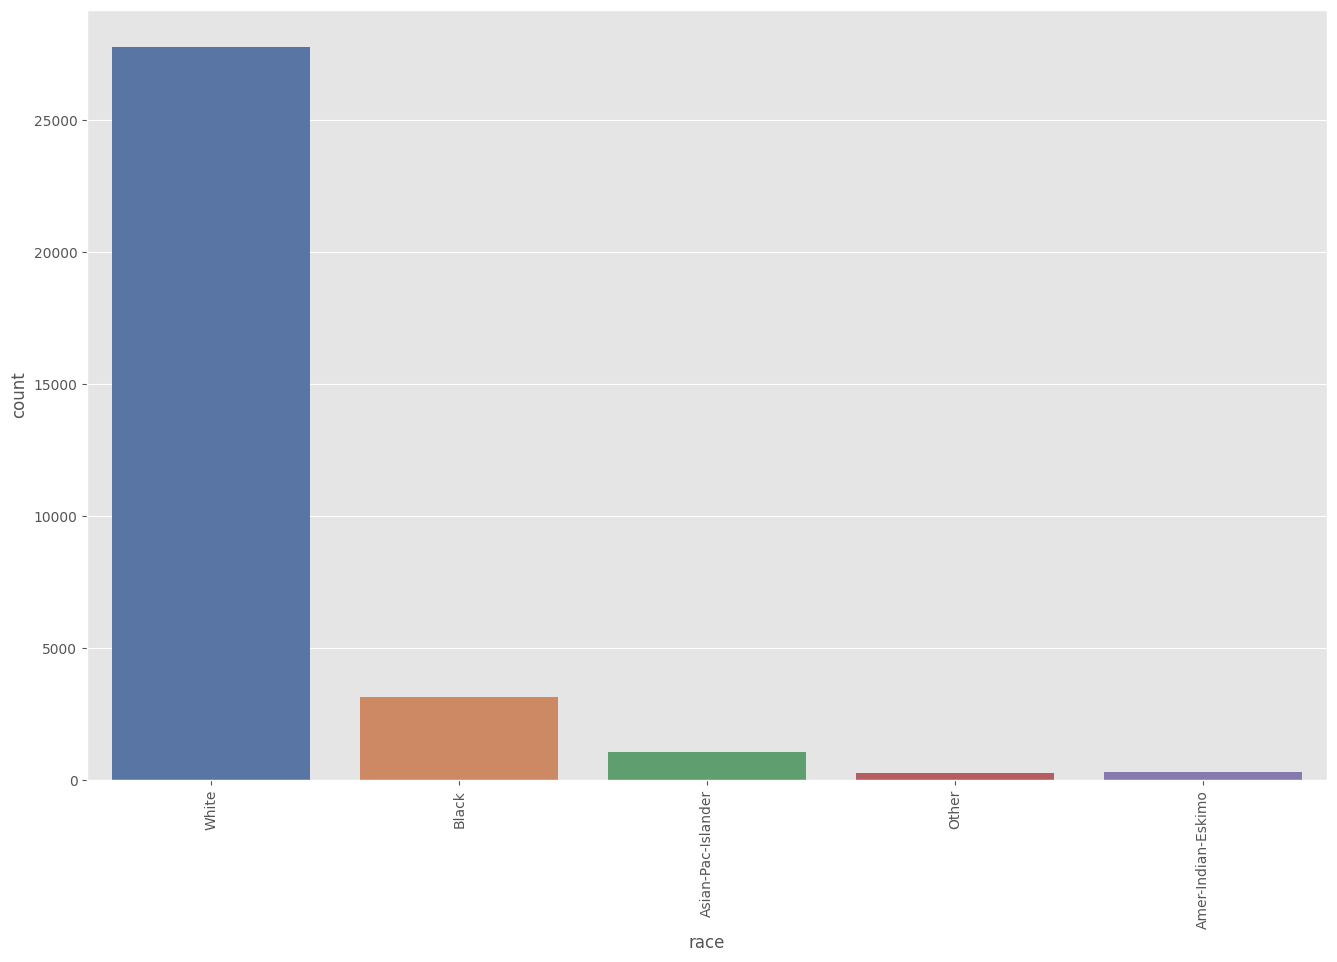

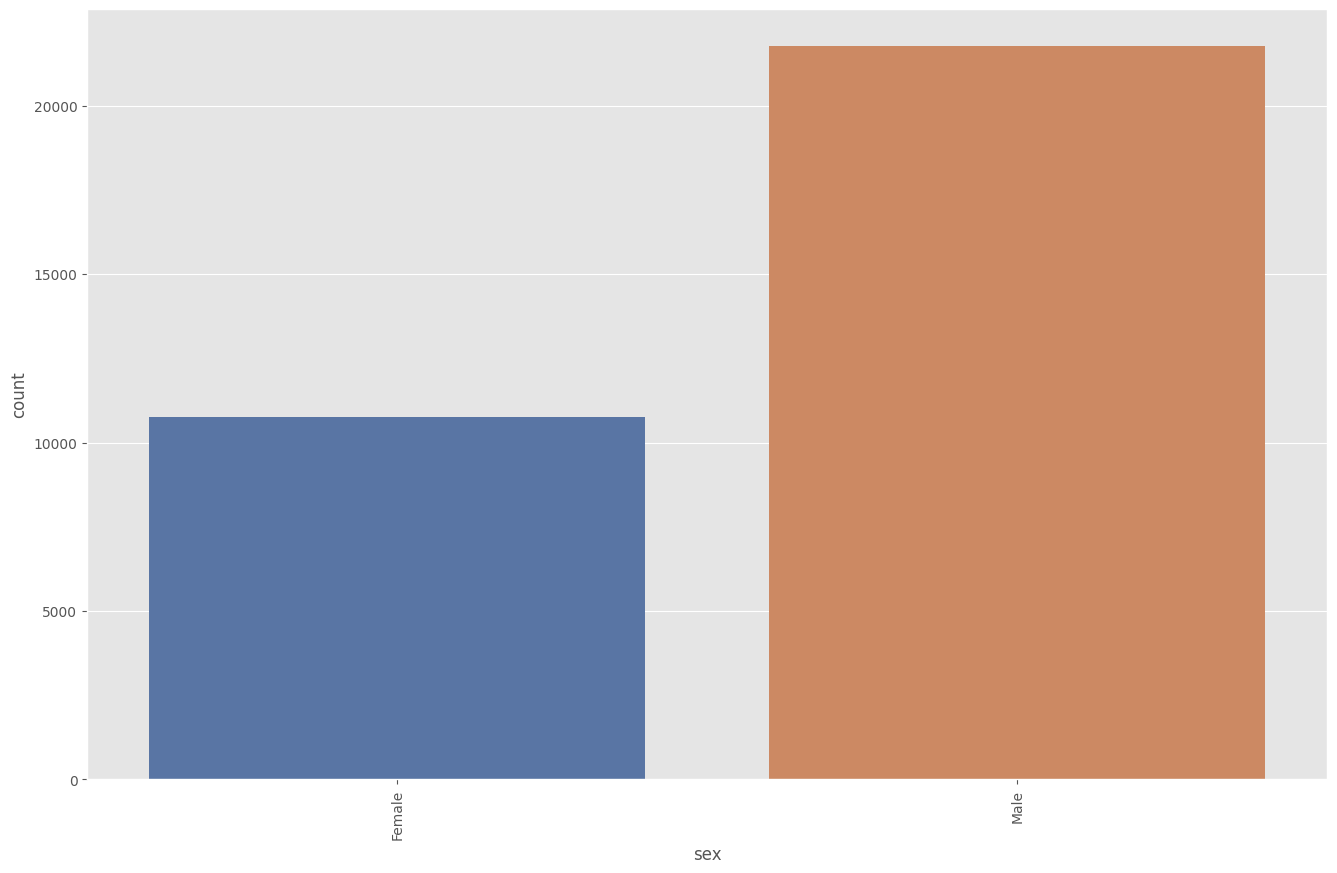

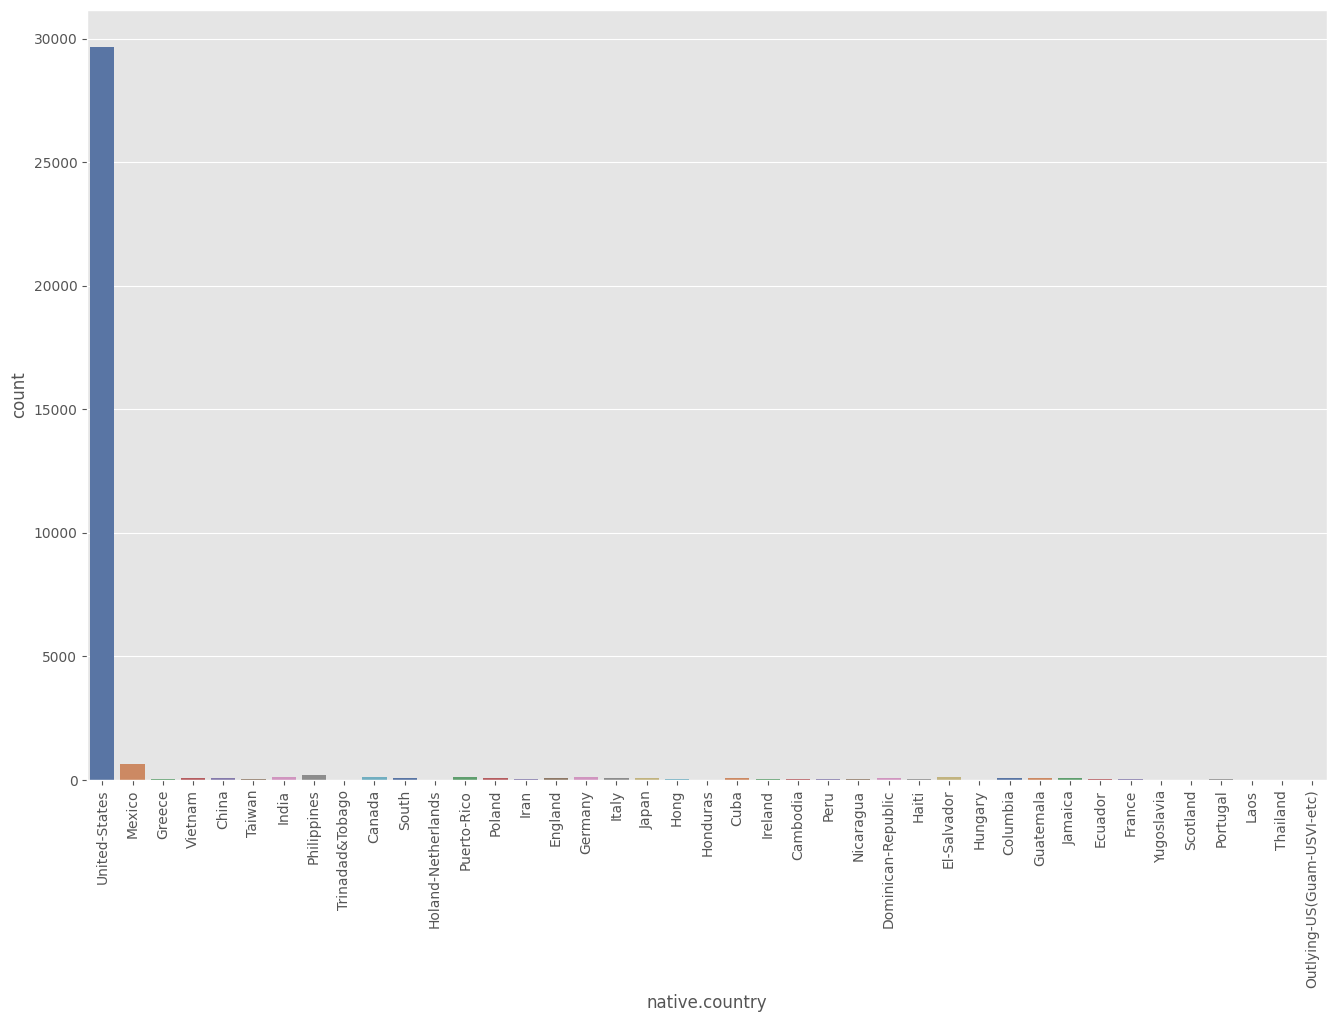

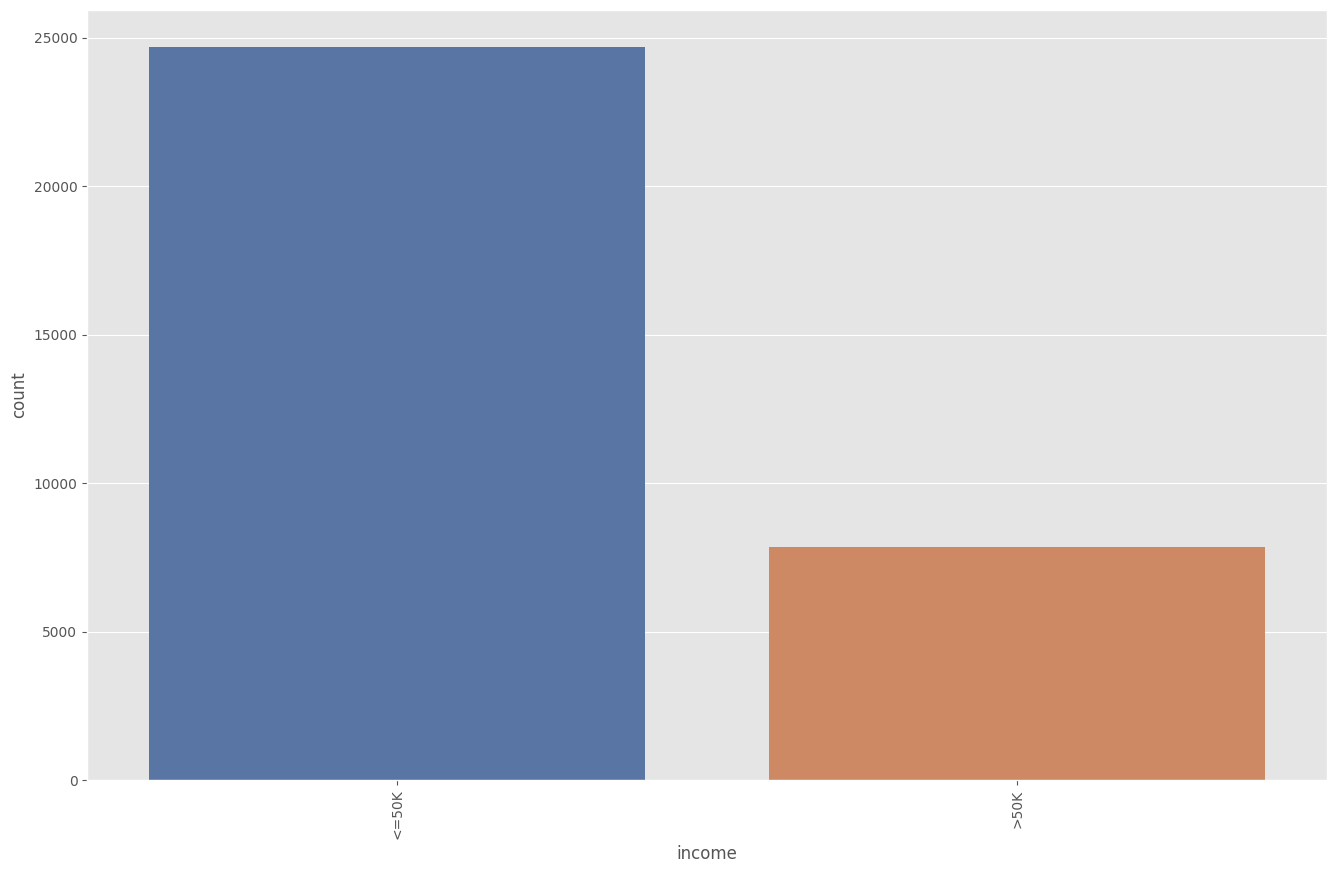

In [20]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x=df[col], hue=df[col], palette='deep', legend=False)
    plt.xticks(rotation=90)
    plt.show

- - Verifie outliers

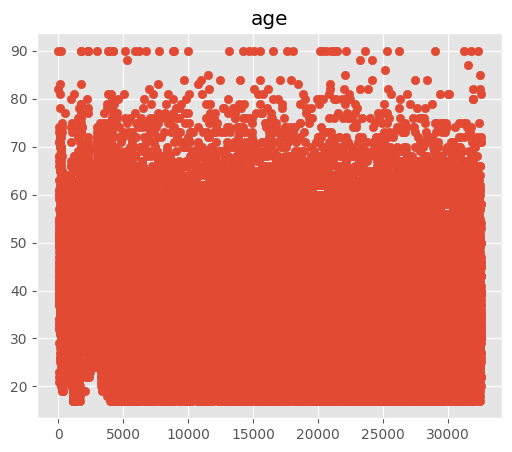

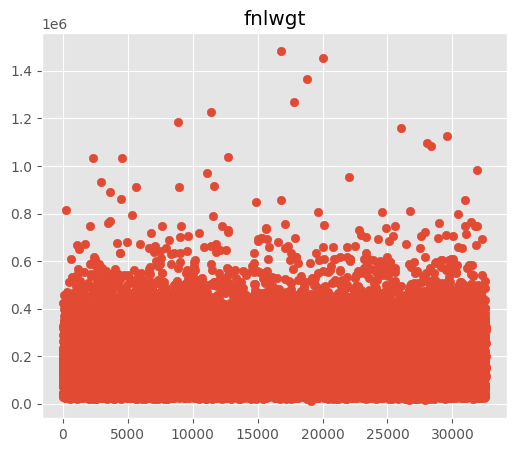

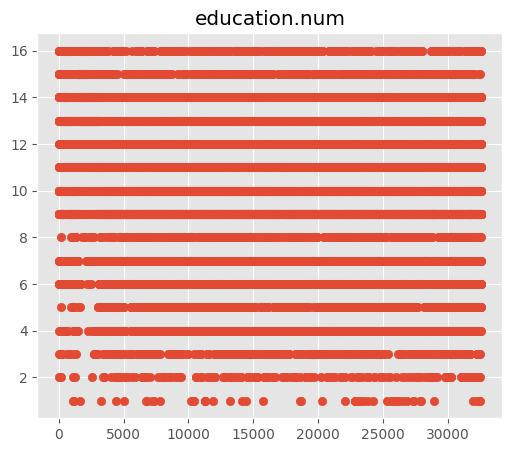

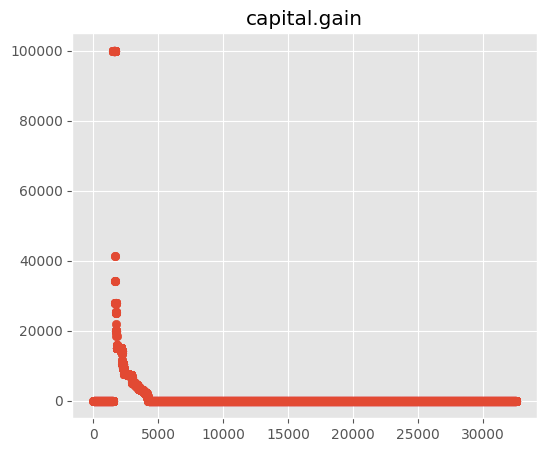

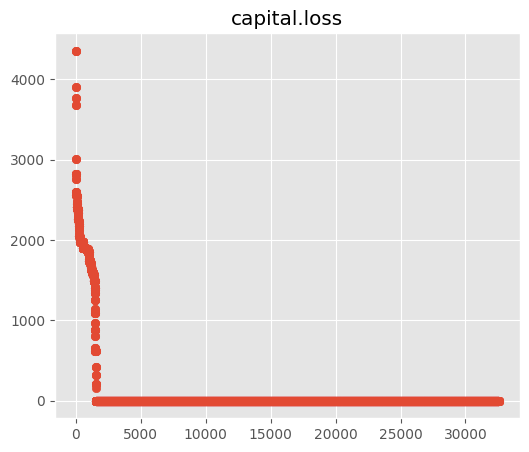

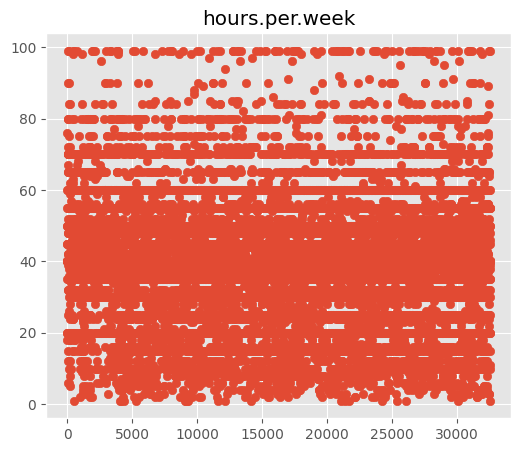

In [21]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = plt.scatter(df.index, df[col])
    plt.title(col)
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

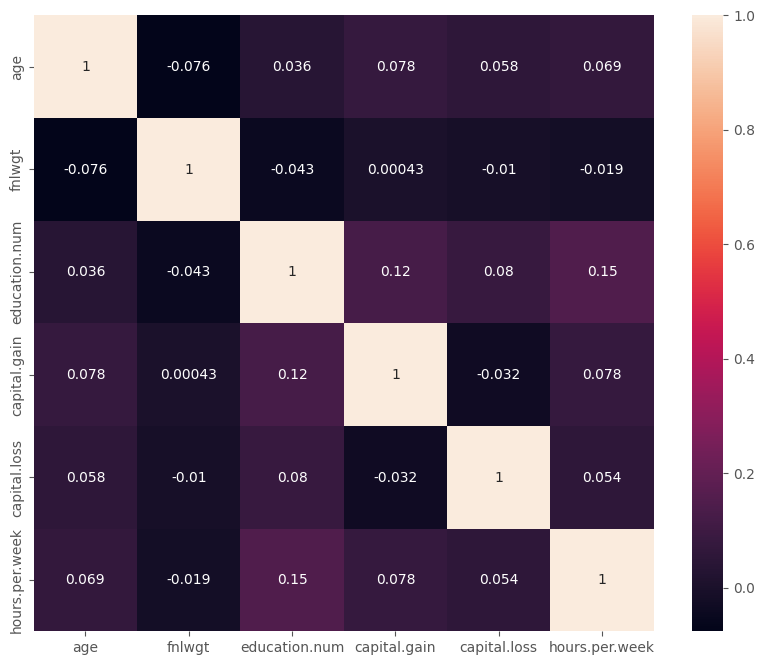

In [22]:
cols = list()
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True )

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


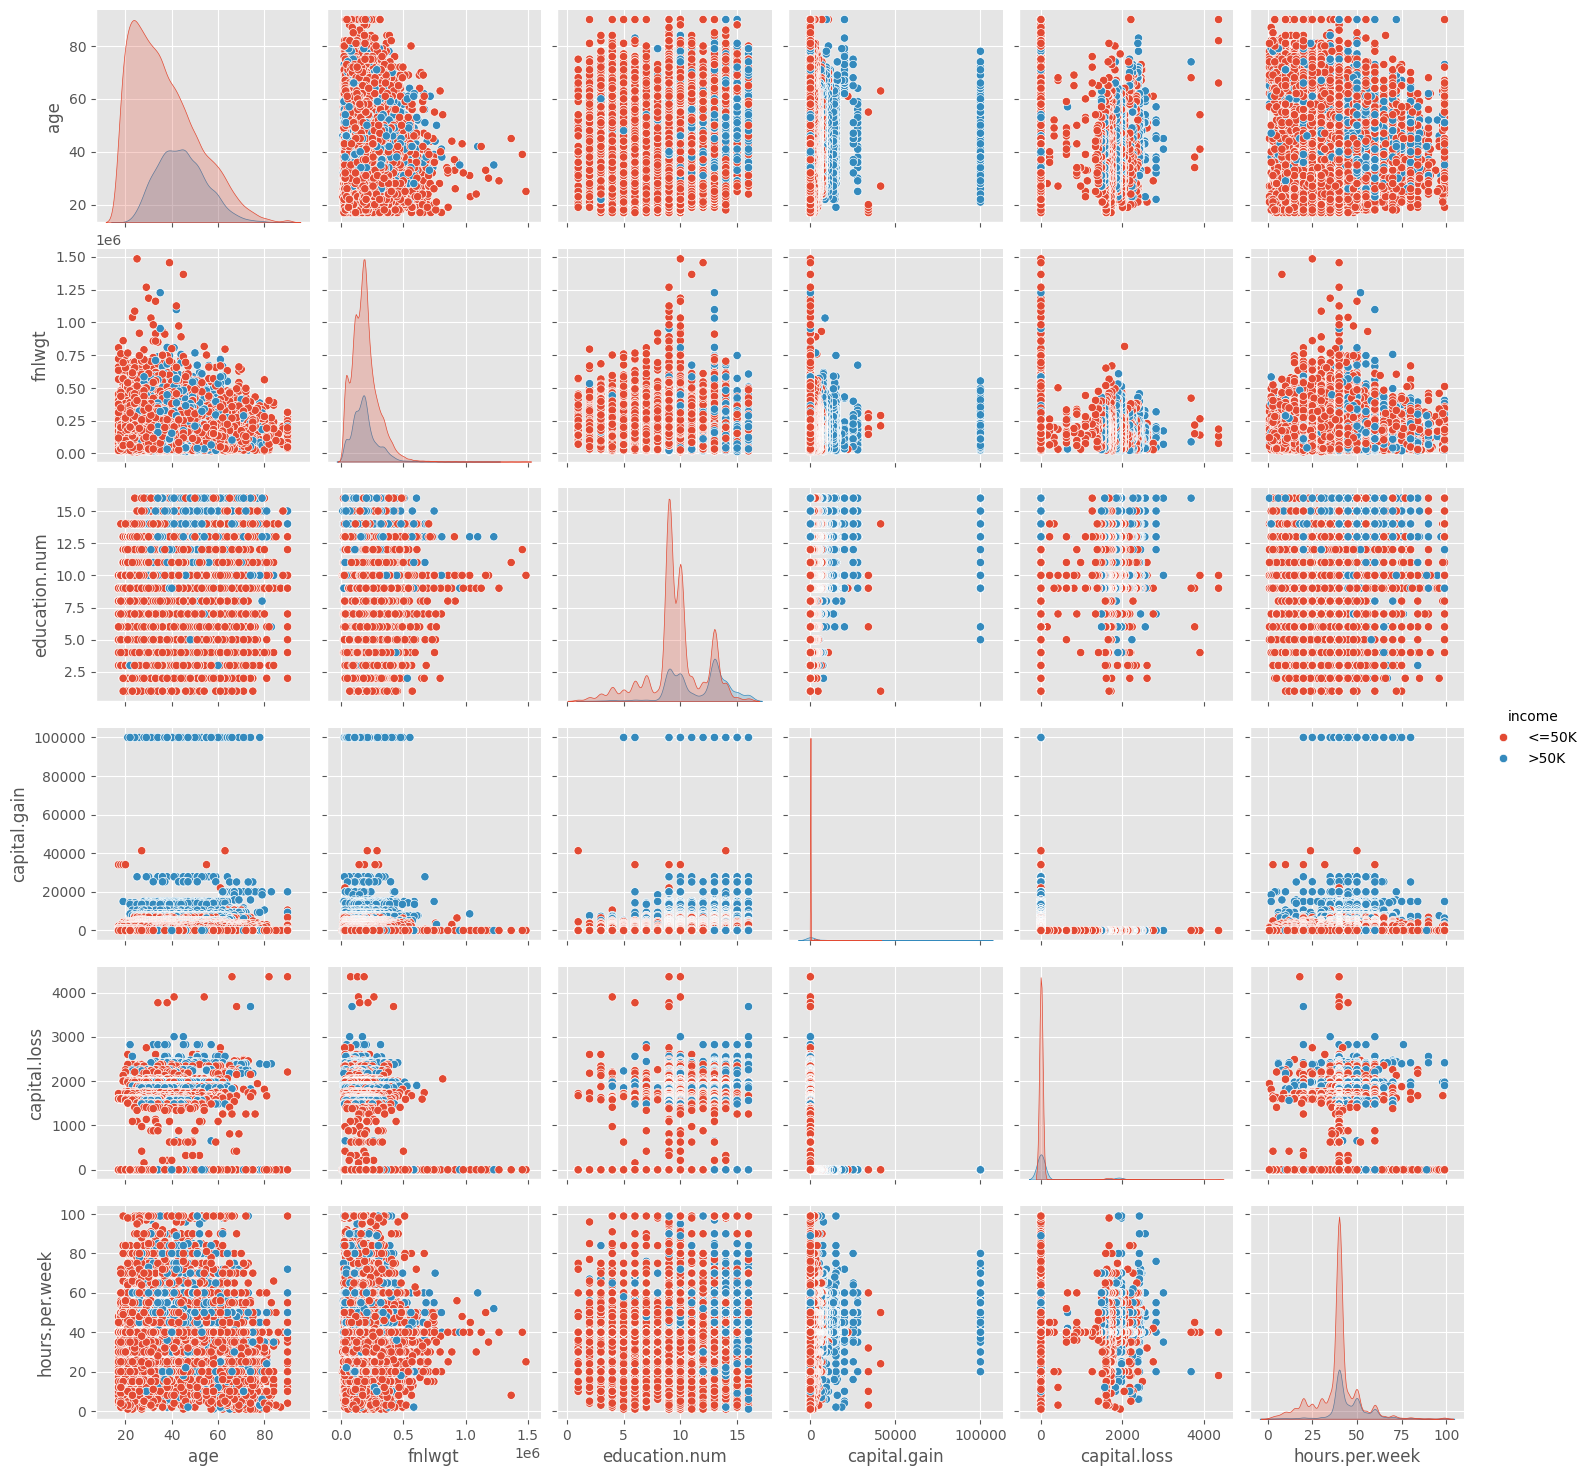

In [23]:
sns.pairplot(df, hue='income')
plt.show()

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

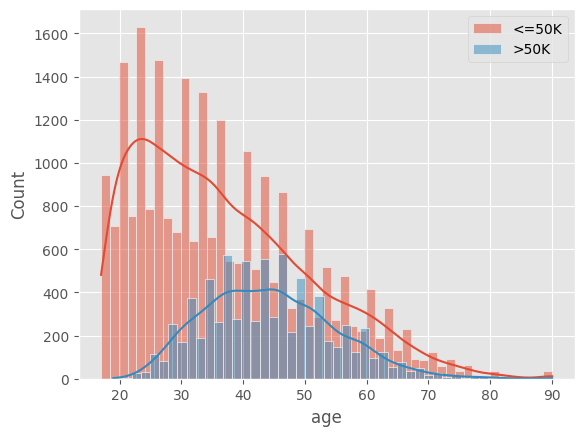

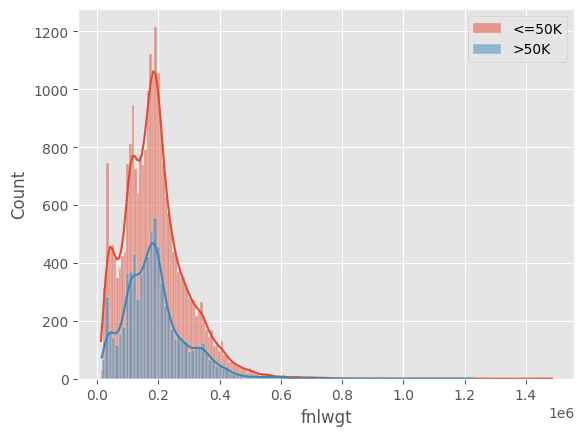

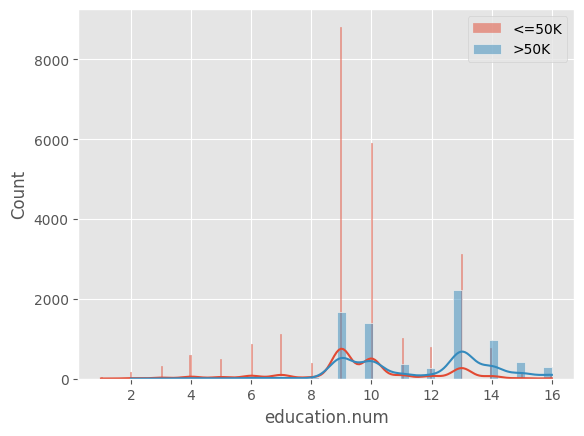

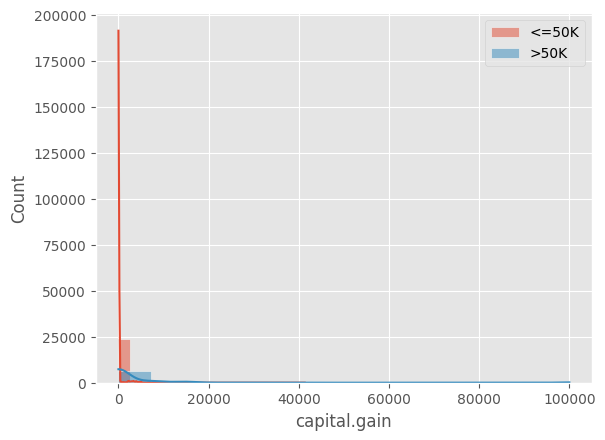

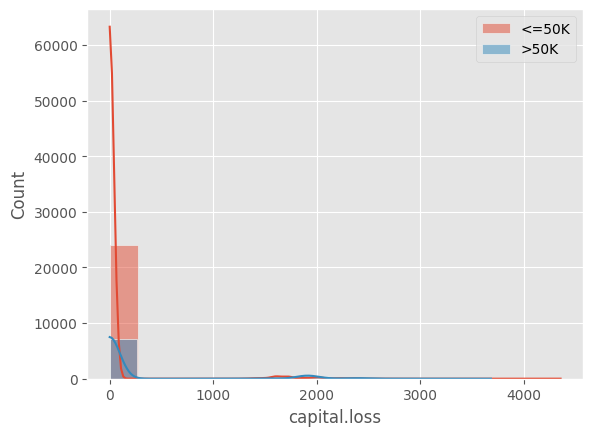

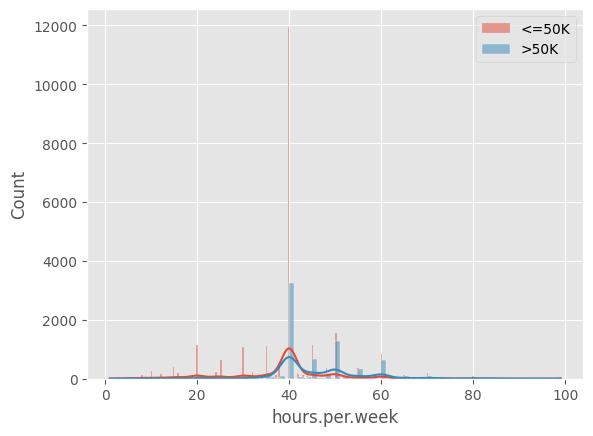

In [30]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()                                 
    for cat in df['income'].unique():
        #Data_A=Data[Data['column_y']==A]
        sns.histplot(df[df['income']==cat][col],kde=True,label=cat)
    plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

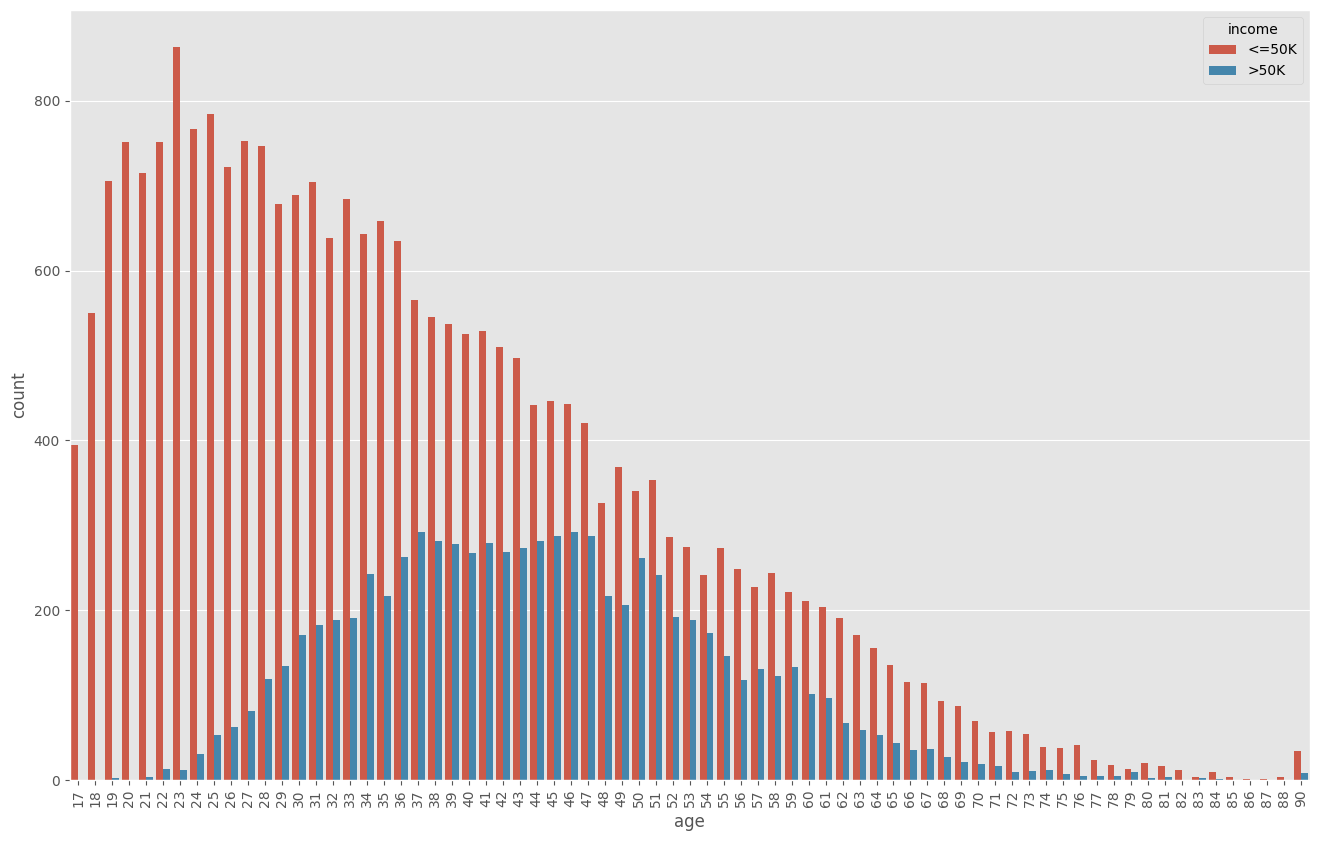

In [31]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x='age',hue=df['income'])  
plt.xticks(rotation=90)
plt.show   

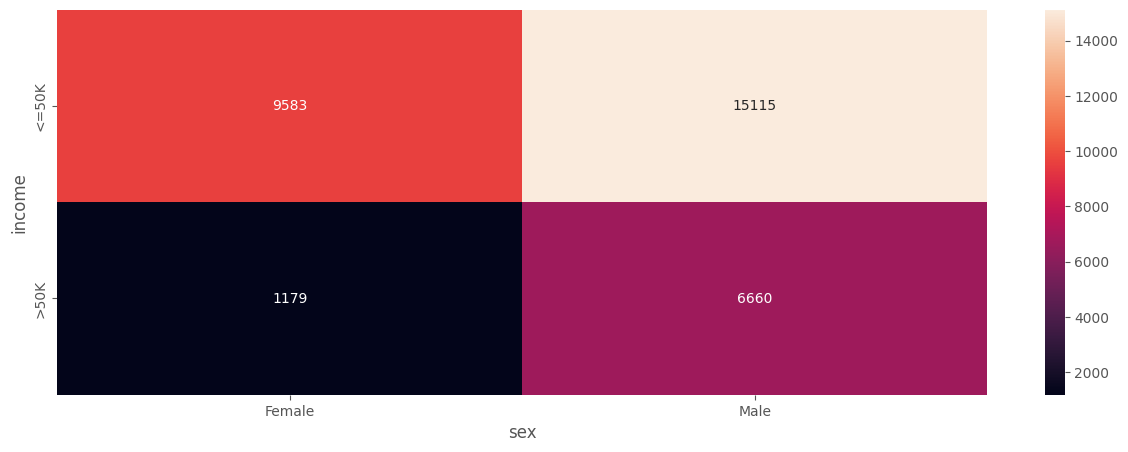

In [32]:
for col in df.select_dtypes(include=['object']):
    if len(df[col].unique()) <4 and col != 'income' :
            plt.figure(figsize=(15,5))
            sns.heatmap(pd.crosstab(df['income'],df[col]), annot=True, fmt='d')   

- - Relation Column/Column : 

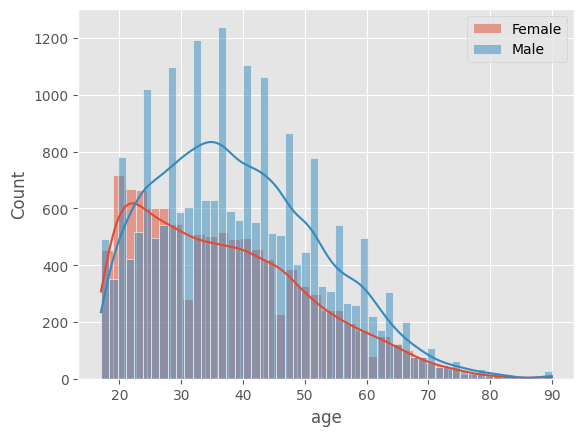

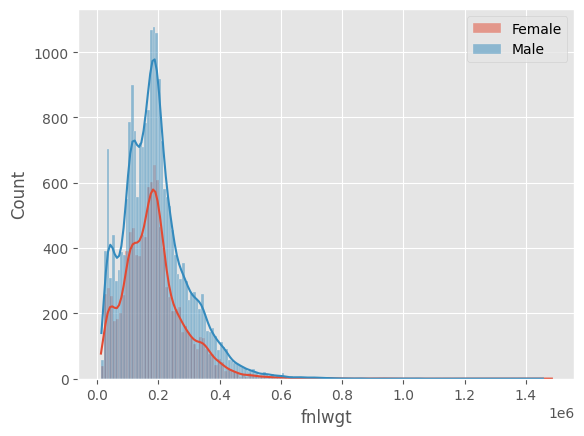

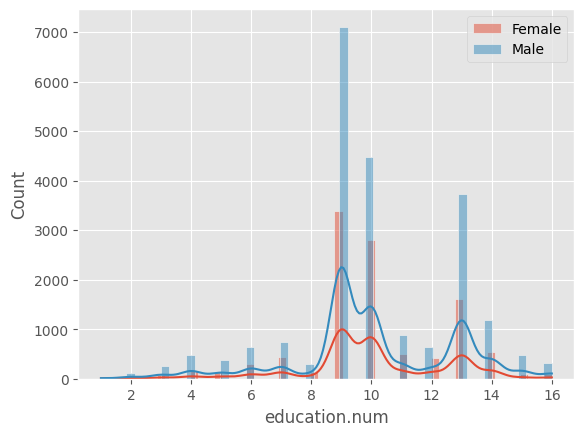

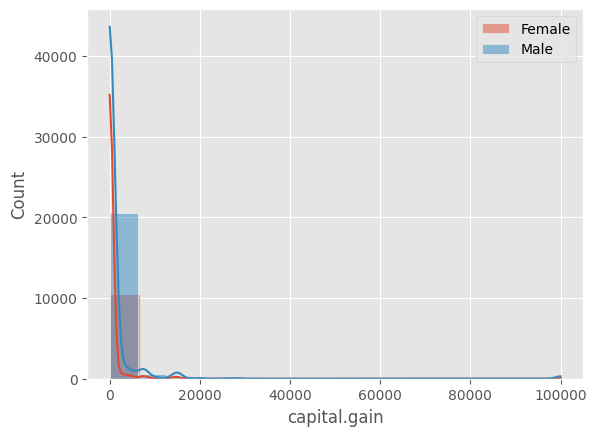

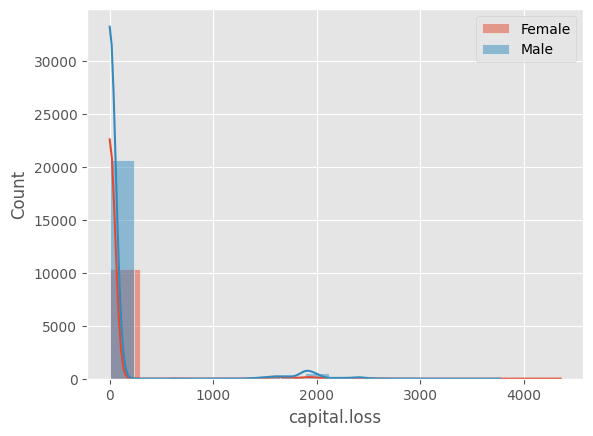

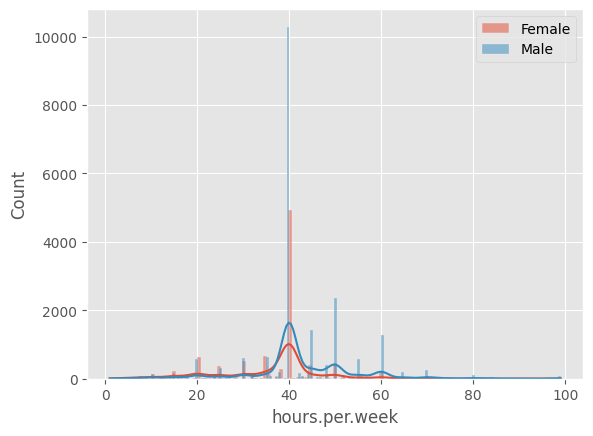

In [36]:
for col in df.select_dtypes(include=['float','int']): 
    plt.figure()           
    for col2 in df.select_dtypes(include=['object']):
        if len(df[col2].unique()) <4 and col != 'income' and col2 != 'income' :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.histplot(df[df[col2]==cat][col],kde=True,label=cat)
            plt.legend()

In [98]:
Female_sum = df[(df['income'] =='>50K')&(df['sex']=='Female')]['sex'].count()
Female_percent = df[(df['sex']=='Female')]['sex'].count()
Male_sum = df[(df['income'] =='>50K')&(df['sex']=='Male')]['sex'].count()
Male_percen=df[(df['sex']=='Male')]['sex'].count()

total = pd.DataFrame([Female_sum,Male_sum], columns=['Total']).rename(index={0: 'Female>50k', 1: 'Male>50k'})
percent = pd.DataFrame([Female_sum/Female_percent,Male_sum/Male_percen], columns=['percent']).rename(index={0: 'Female>50k', 1: 'Male>50k'})

Data = pd.concat([total, percent], axis=1)
Data

,Total,percent
Female>50k,1179,0.109552
Male>50k,6660,0.305855


# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>

- - Rate of 'income' depending to each col => prove if the rate of 'income' are not equal

In [99]:
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['income']=="<=50k"
    index_B=df['income']==">50k"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejetée X'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Non Rejetée'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- H0 Non Rejetée
workclass----------------------------------------- Not Numeric
fnlwgt-------------------------------------------- H0 Non Rejetée
education----------------------------------------- Not Numeric
education.num------------------------------------- H0 Non Rejetée
marital.status------------------------------------ Not Numeric
occupation---------------------------------------- Not Numeric
relationship-------------------------------------- Not Numeric
race---------------------------------------------- Not Numeric
sex----------------------------------------------- Not Numeric
capital.gain-------------------------------------- H0 Non Rejetée
capital.loss-------------------------------------- H0 Non Rejetée
hours.per.week------------------------------------ H0 Non Rejetée
native.country------------------------------------ Not Numeric
income-------------------------------------------- Not Numeric


# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [100]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

- - Train_test_split

<Axes: title={'center': 'Data_test'}, ylabel='count'>

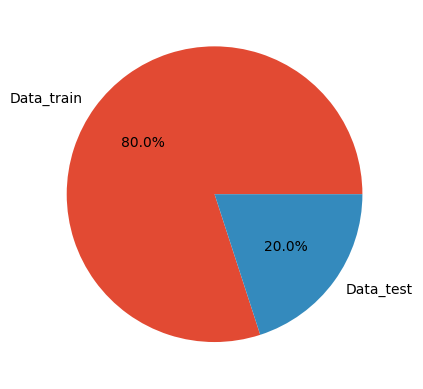

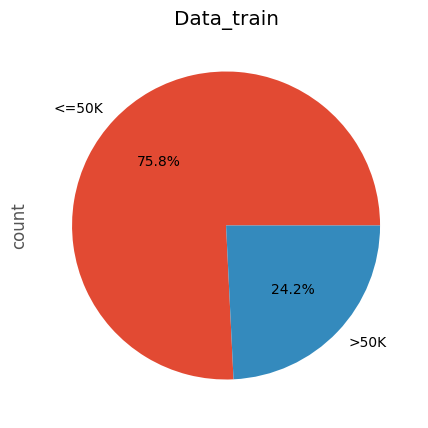

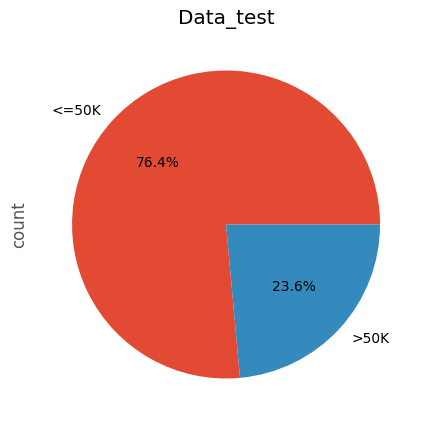

In [101]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%')
################################################(use it only for object target class )
#chek train['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_train')
Data_train['income'].value_counts().plot.pie(autopct='%1.1f%%')
#chek test['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_test')
Data_test['income'].value_counts().plot.pie(autopct='%1.1f%%')

In [102]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data)   
    # alwayse use it
    X = data.drop('income',axis=1)
    y = data['income']
    # only for target classification
    print(y.value_counts())
    return X,y

dict_keys(['workclass'])
classed found :  ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', nan]
Updates dataframe is : 
        age  workclass  fnlwgt     education  education.num  \
27637   47          4  205100       HS-grad              9   
18820   52          3   89041     Bachelors             13   
21937   60          3   96099  Some-college             10   
7879    41          5  190290       HS-grad              9   
4890    53          4  128272     Doctorate             16   
...    ...        ...     ...           ...            ...   
13126   35          3  107160          12th              8   
19655   21          3  189013  Some-college             10   
9847    70          1  176493  Some-college             10   
10801   28          5  190836       HS-grad              9   
2732    39          3  224531       HS-grad              9   

              marital.status       occupation   relationship   

<Axes: title={'center': 'Data_test'}, ylabel='count'>

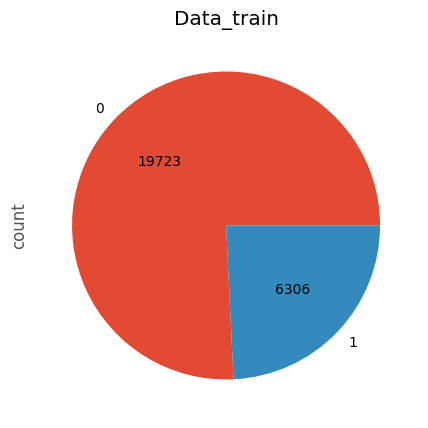

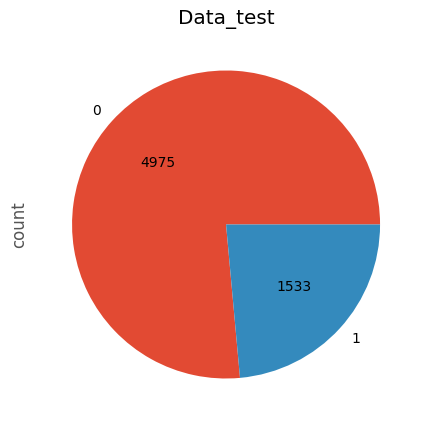

In [103]:
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

#check nbr of row y_train['column_y'] after elimin nan
plt.figure(figsize=(15,5))
plt.title('Data_train')
y_train.value_counts().plot.pie(
    autopct=lambda p:f'{p*sum(y_train.value_counts())/100 :.0f}')
#check nbr of row y_test['column_y'] after elimin nan
plt.figure(figsize=(15,5))
plt.title('Data_test')
y_test.value_counts().plot.pie(
    autopct=lambda p:f'{p*sum(y_test.value_counts())/100 :.0f}')

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [111]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.7991702519975414


accuracy_score :  0.7991702519975414
confusion_matrix :  [[4239  736]
 [ 571  962]]
f1_score :  0.7991702519975413
classification_report :                precision    recall  f1-score   support

           0       0.88      0.85      0.87      4975
           1       0.57      0.63      0.60      1533

    accuracy                           0.80      6508
   macro avg       0.72      0.74      0.73      6508
weighted avg       0.81      0.80      0.80      6508

recall_score :  [0.8520603  0.62752772]
precision_score :  [0.88128898 0.56654888]


<Axes: >

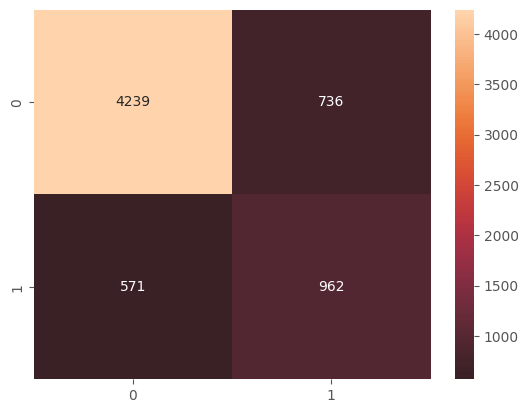

In [112]:
from sklearn.metrics import precision_score, accuracy_score,confusion_matrix, f1_score, recall_score, precision_recall_curve, classification_report

def scoring(y_test,y_pred):
    # Accuracy : acc= -((y-y_pred)**2/(y-y_mean)**2)  #this model describe in % the variation of y
    acc=accuracy_score(y_test, y_pred)        

    #best score is with Diagonal matrix   #visualisation of result               [[TP FP]
    cm = confusion_matrix(y_test, y_pred)                                        #[FN TN]]        

    # F1 Score : 2*(precision*recall)/(precision +recall) #average= can be : None,binary,micro,weighted,samples
    f1 = f1_score(y_test, y_pred, average='micro')         

    # Classification report :    #get (accuracy acc, score f1, cm)
    cr = classification_report(y_test,y_pred)

    # Recall Score : (Sensitivity) (TP / float(TP + FN)) == 1/1+2  #average= can be : None,binary,macro,weighted,samples
    rs = recall_score(y_test, y_pred, average=None)        

    # Precision Score : (Specificity) (TP / float(TP + FP))
    ps = precision_score(y_test, y_pred, average=None)
    return acc,cm,f1,cr,rs,ps
#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d")       

In [113]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [114]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.7999385371850031


accuracy_score :  0.7999385371850031
confusion_matrix :  [[4726  249]
 [1053  480]]
f1_score :  0.7999385371850031
classification_report :                precision    recall  f1-score   support

           0       0.82      0.95      0.88      4975
           1       0.66      0.31      0.42      1533

    accuracy                           0.80      6508
   macro avg       0.74      0.63      0.65      6508
weighted avg       0.78      0.80      0.77      6508

recall_score :  [0.94994975 0.31311155]
precision_score :  [0.81778854 0.65843621]


<Axes: >

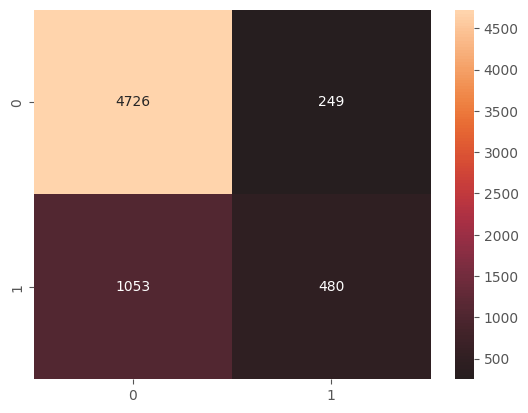

In [115]:
from sklearn.metrics import precision_score, accuracy_score,confusion_matrix, f1_score, recall_score, precision_recall_curve, classification_report

def scoring(y_test,y_pred):
    # Accuracy : acc= -((y-y_pred)**2/(y-y_mean)**2)  #this model describe in % the variation of y
    acc=accuracy_score(y_test, y_pred)        

    #best score is with Diagonal matrix   #visualisation of result               [[TP FP]
    cm = confusion_matrix(y_test, y_pred)                                        #[FN TN]]        

    # F1 Score : 2*(precision*recall)/(precision +recall) #average= can be : None,binary,micro,weighted,samples
    f1 = f1_score(y_test, y_pred, average='micro')         

    # Classification report :    #get (accuracy acc, score f1, cm)
    cr = classification_report(y_test,y_pred)

    # Recall Score : (Sensitivity) (TP / float(TP + FN)) == 1/1+2  #average= can be : None,binary,macro,weighted,samples
    rs = recall_score(y_test, y_pred, average=None)        

    # Precision Score : (Specificity) (TP / float(TP + FP))
    ps = precision_score(y_test, y_pred, average=None)
    return acc,cm,f1,cr,rs,ps
#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d")       